<a href="https://colab.research.google.com/github/daliloyogi/BigData/blob/main/kaggle_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Tree**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# mengimpor kelas tempat DT diimplementasikan
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR

In [24]:
# mengimpor dataset drugs
drugs = pd.read_csv('/content/archive.zip')
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


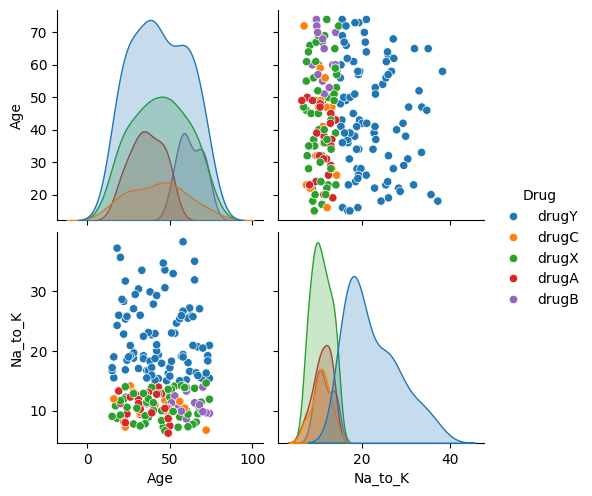

In [4]:
# mendapatkan pairplot dari data 'drugs' dengan setiap titik berwarna sesuai dengan kategori yang diberikan oleh kolom 'Drug'

sns.pairplot(data=drugs, hue='Drug');

In [5]:
# memberikan informasi tentang struktur DataFrame drugs, termasuk informasi tentang jumlah baris dan kolom, jenis data di setiap kolom, dan jumlah nilai non-null di setiap kolom.
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# let's see the categorical features
drugs.describe(include='O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [22]:
# We have some categorical features let's encode them
# we can use one_hot_encodeing
# or we can use labee_encoding
# let's chooce label_encoding for this problem
from sklearn.preprocessing import LabelEncoder

# initiating the class
label_enc = LabelEncoder()

# columns that are categorical
cols = drugs.select_dtypes(include='O').columns
# looping on each column in the dataset
for col in cols:
    # Label encoding each column
    drugs[col] = label_enc.fit_transform(drugs[col])

# displaying the data after encoding
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [8]:
# dividing the data into X, y
# X: the features
# y : the target 🎯
X = drugs.drop(columns='Drug')
y = drugs['Drug']

In [9]:
# let's see our data X, y
display(X.head(3), y.head(3))

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114


0    4
1    2
2    2
Name: Drug, dtype: int64

In [10]:
# now we need to split the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [11]:
# Building the model
tree_clf0 = DTC()
# Fitting the model
tree_clf0.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
# let's see the model score (acc) on the training set
tree_clf0.score(X_train, y_train)

1.0

In [14]:
# another way of calculating the accuracy
from sklearn.metrics import accuracy_score, classification_report
y_pred = tree_clf0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [15]:
# third way using more than one metric
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



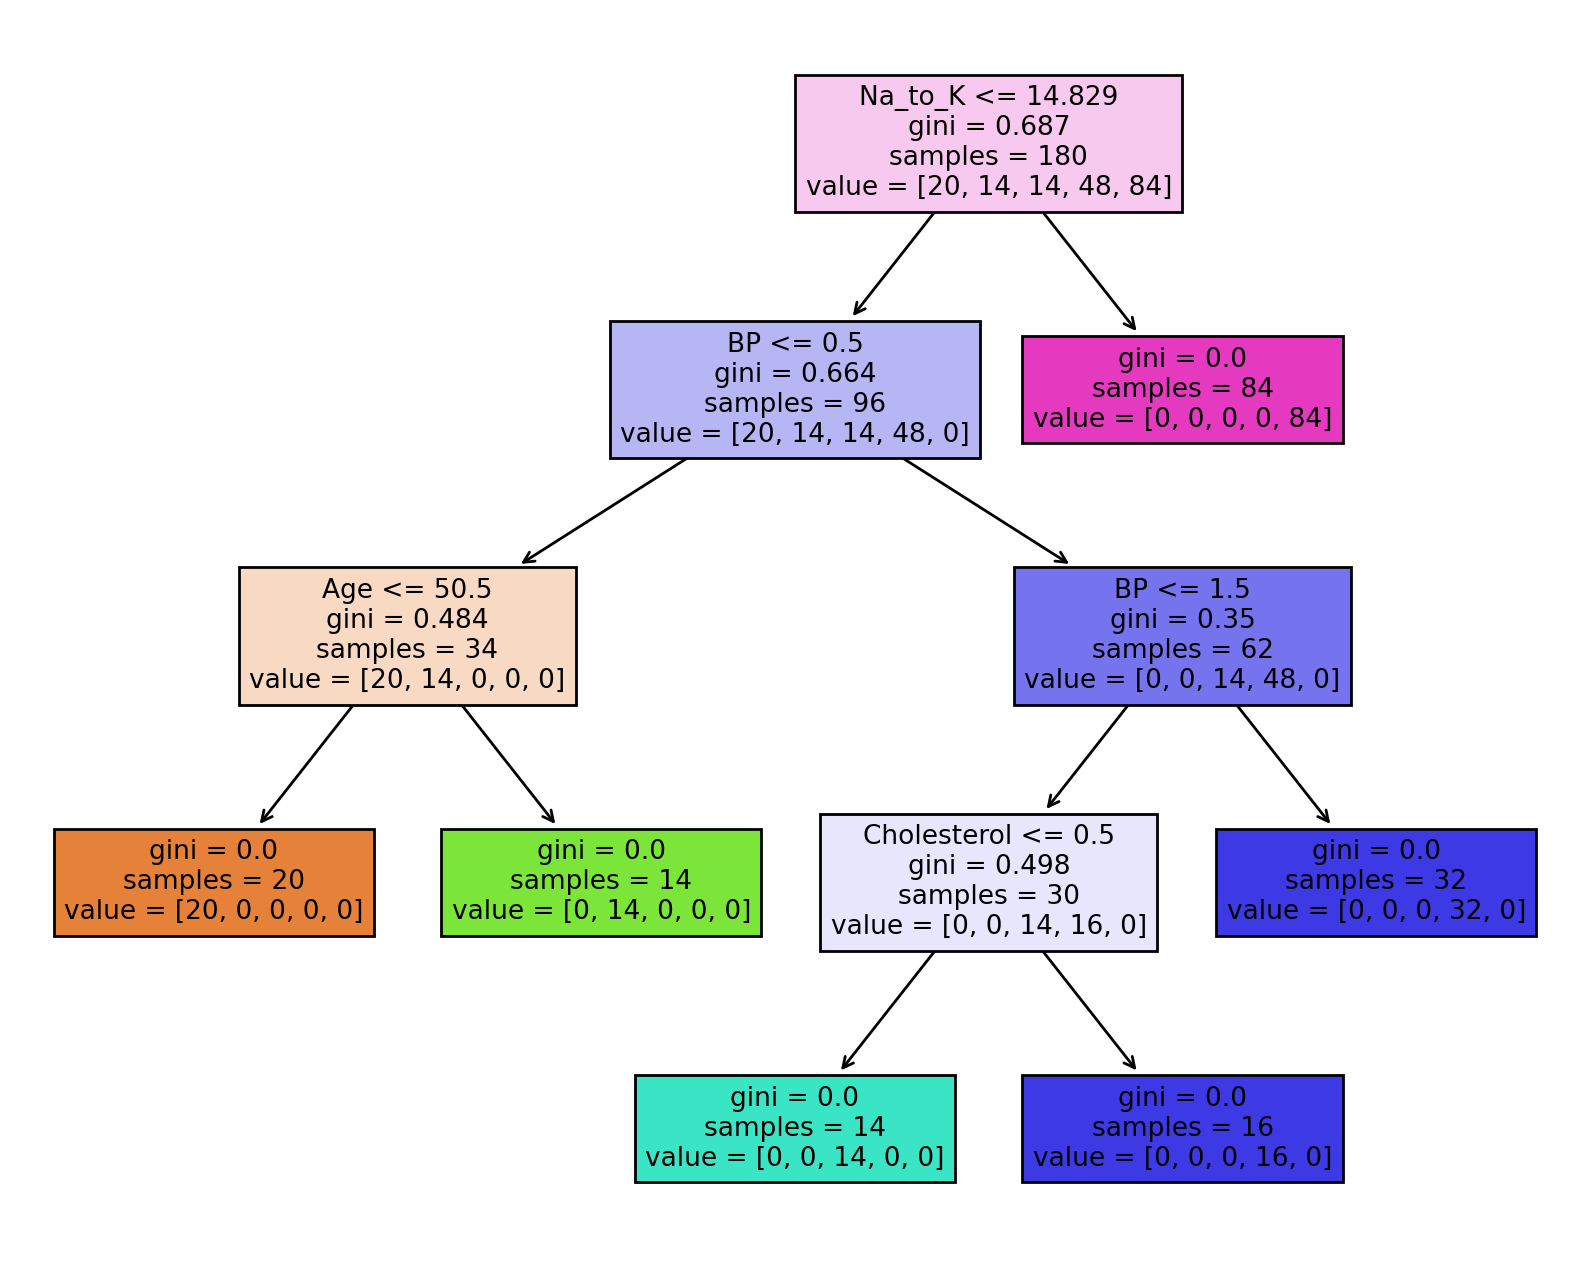

In [16]:
# visualsing👀 the Decision Tree🌳
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(tree_clf0, feature_names=drugs.columns, filled=True);
# Optinal parameters
# feature_names=drugs.columns, filled=True
# filled=True  colors

**Credit Risk**

In [36]:
# reading the dataset
risk = pd.read_csv('/content/archive (1).zip')
risk.head(4)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2


In [37]:
# data size
risk.shape

(32581, 12)

In [38]:
# some info
risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [39]:
# describing the dataset
risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [41]:
# describing the dataset object features
risk.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [42]:
risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

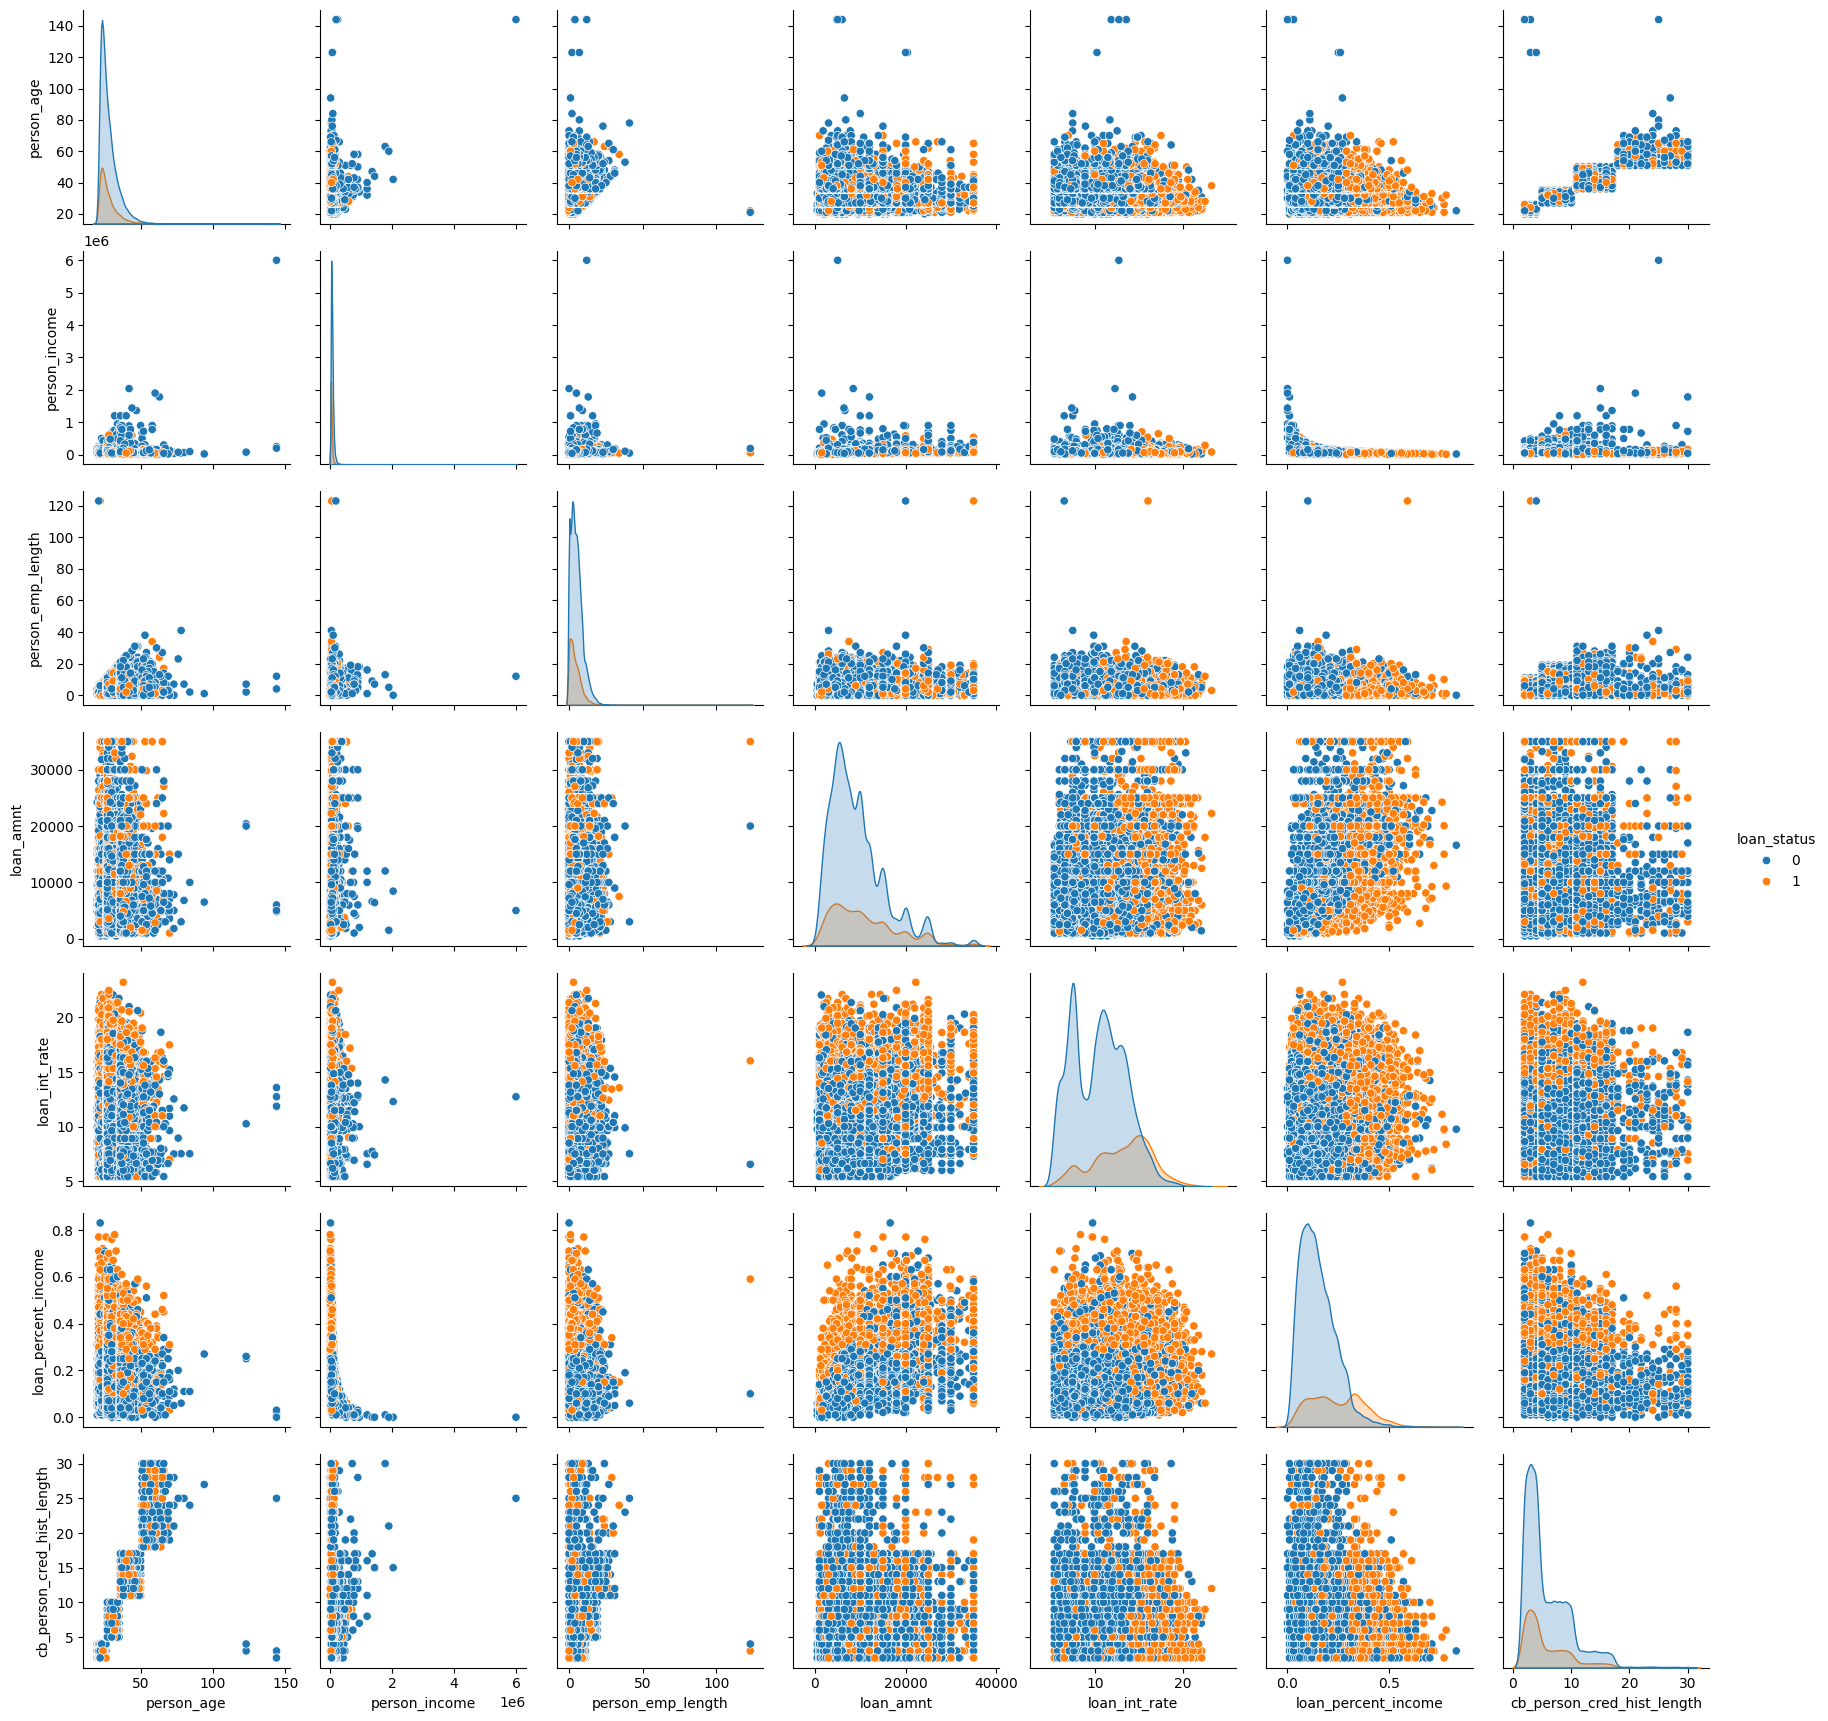

In [43]:
# dealing with the messing data
'''
person_emp_length              895  /32581
loan_int_rate                 3116  /32581
'''
# we need to understand more about these features
sns.pairplot(data=risk, hue='loan_status')

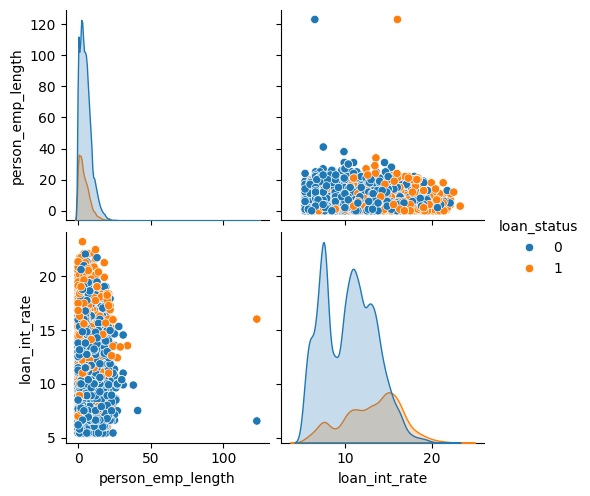

In [44]:
sns.pairplot(data=risk[['person_emp_length', 'loan_int_rate', 'loan_status']], hue='loan_status')

<ipython-input-45-1b7cef9a0cb8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = risk.corr()


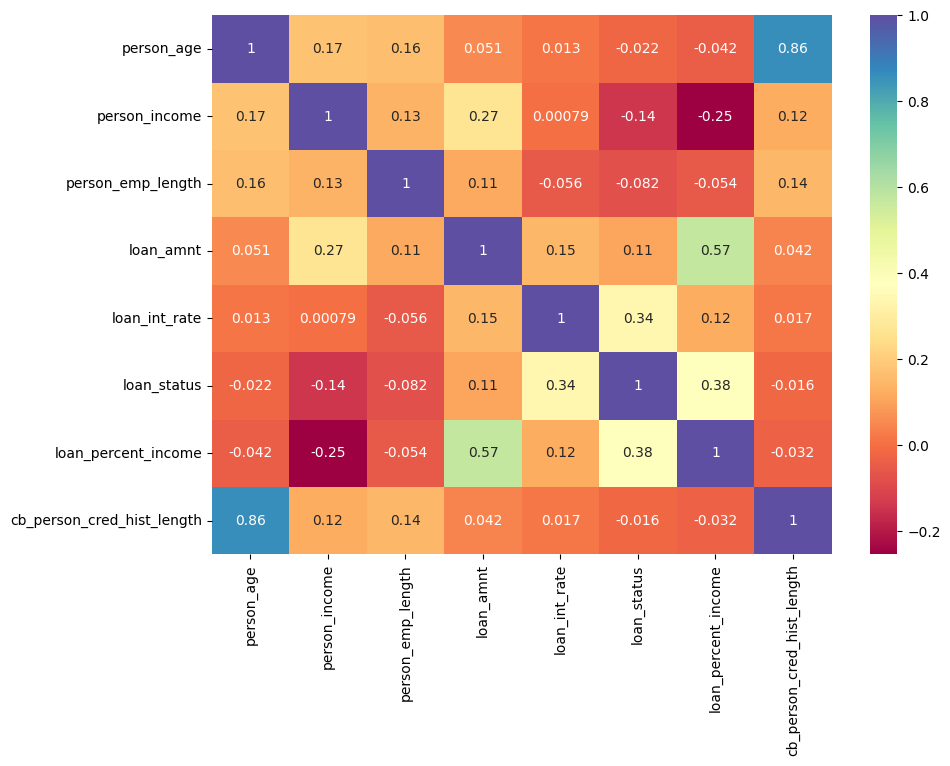

In [45]:
# let's see the correlation
correlation = risk.corr()
plt.figure(figsize=(10,7))
corr_map = sns.heatmap(correlation, annot=True, cmap="Spectral")

'\nnp.ones_like(correlation, dtype=bool) creates a boolean matrix of the same shape as correlation.\nIt sets all elements to True initially because we\'re going to use this as a mask.\n\nnp.triu(...) stands for "upper triangle" and is a NumPy function that zeros out (sets to False) all \nthe elements below the main diagonal of the matrix. In other words, it keeps only the upper triangle intact. \n\n1 2 3\n4 5 6\n7 8 9\n\nApplying np.triu(...) would give you:\n\n1 2 3\n0 5 6\n0 0 9\n'

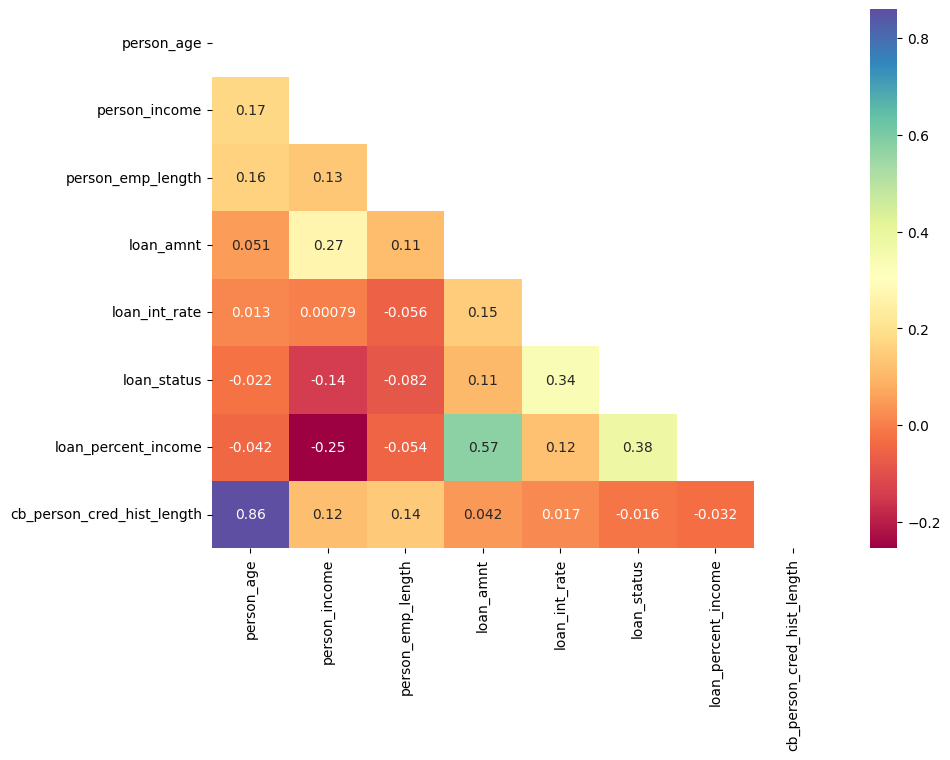

In [46]:
mask_up = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(10,7))
sns.heatmap(correlation, cmap='Spectral', mask=mask_up, annot=True)
'''
np.ones_like(correlation, dtype=bool) creates a boolean matrix of the same shape as correlation.
It sets all elements to True initially because we're going to use this as a mask.

np.triu(...) stands for "upper triangle" and is a NumPy function that zeros out (sets to False) all
the elements below the main diagonal of the matrix. In other words, it keeps only the upper triangle intact.

1 2 3
4 5 6
7 8 9

Applying np.triu(...) would give you:

1 2 3
0 5 6
0 0 9
'''

In [ ]:
# dealing with the messing data
'''
person_emp_length              895  /32581
loan_int_rate                 3116  /32581
'''
risk.person_emp_length.value_counts()z

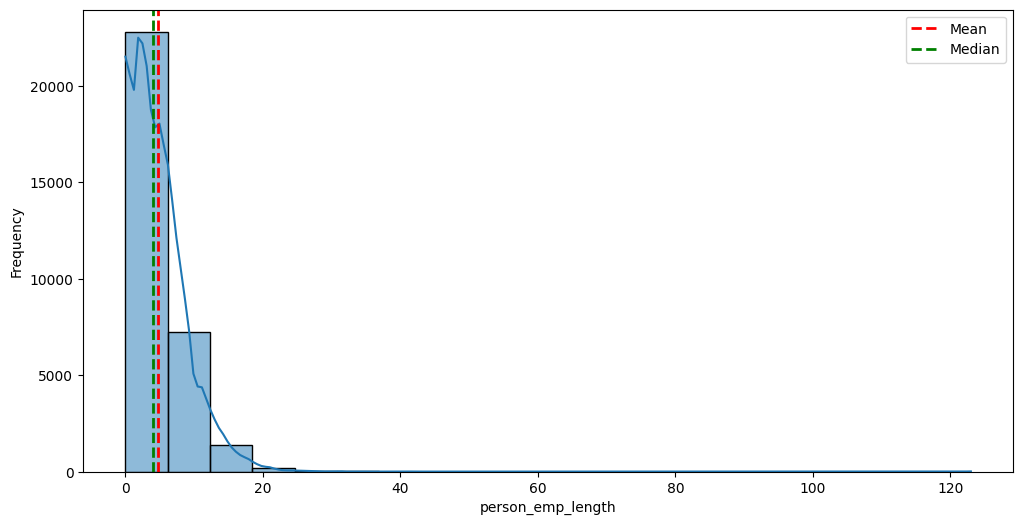

In [47]:
# The Question here "Which to use Mean or Median"?
# Create a histogram using Seaborn
# main code
plt.figure(figsize=(12, 6))
sns.histplot(risk['person_emp_length'].dropna(), bins=20, kde=True)
# --------------------end of the important code -----------------#

# Calculate mean and median
mean_value = risk['person_emp_length'].mean()
median_value = risk['person_emp_length'].median()

# plt.figure(figsize=(10, 7))
# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

# Add labels and legend
plt.xlabel('person_emp_length')
plt.ylabel('Frequency')
plt.legend()
# it won't make a difference in this case
# use median if the data  skewed or contains outliers,
# The median is less sensitive to extreme values (outliers) than the mean.
# Choose the mean if the distribution is approximately symmetric


In [48]:
# filing using the median
risk['person_emp_length'].fillna(risk['person_emp_length'].median(), inplace=True)

In [49]:
# checking
risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

11.011694892245036 10.99


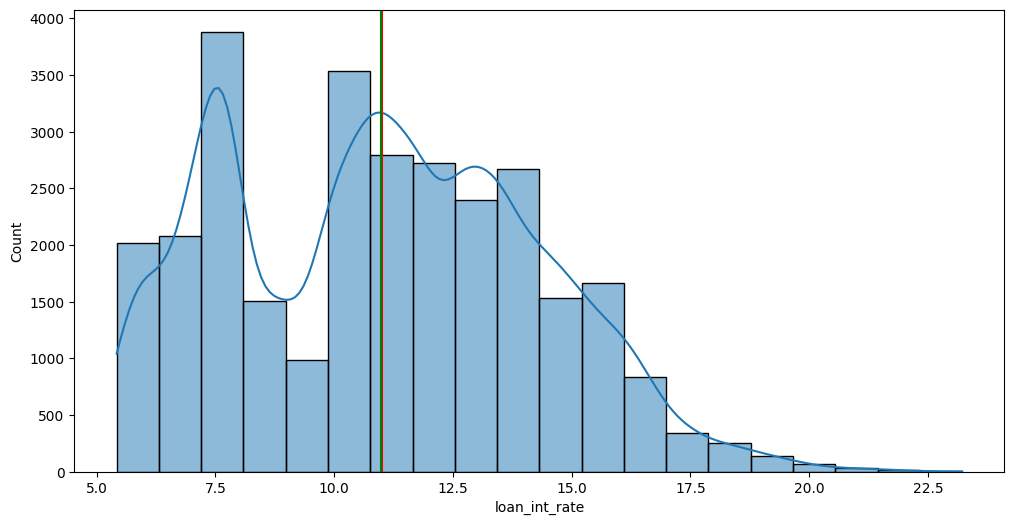

In [50]:
# loan interset rate
plt.figure(figsize=(12, 6))
sns.histplot(risk['loan_int_rate'].dropna(), bins=20, kde=True)

# ploting the mean and median
mean, median = risk['loan_int_rate'].mean(), risk['loan_int_rate'].median()

plt.axvline(mean, color='red')
plt.axvline(median, color ='green')

print(mean, median)
# almost the same

In [51]:
# filling with the mean
risk['loan_int_rate'].fillna(risk['loan_int_rate'].mean(), inplace=True)

In [52]:
risk.isnull().sum()
# perfect ✅

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [53]:
# now let's encode the data
# What columns need encoding
risk.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   person_home_ownership      32581 non-null  object
 1   loan_intent                32581 non-null  object
 2   loan_grade                 32581 non-null  object
 3   cb_person_default_on_file  32581 non-null  object
dtypes: object(4)
memory usage: 1018.3+ KB


In [56]:
cols = risk.select_dtypes(include='O').columns
cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [57]:
for col in cols:
    print("="*50, col)
    print(risk[col].value_counts())

================================================== person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64
================================================== loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64
================================================== loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64
================================================== cb_person_default_on_file
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64


In [58]:
# let's label encode this features
lenc = LabelEncoder()

# loop over each column with the type 'object' => string
for col in cols:
    # fit_transform
    risk[col] = lenc.fit_transform(risk[col])

# displaying
risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


In [59]:
risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.0 MB


In [60]:
# 🌳 very intersting thing about the tree it doesn't need scaling the data
# the alogrithms that need sclaing mostly depend on distance or using variance
# but here the true work based on the purity of a node
# that is why also I prefered to use label encoding
# it's perfect with using classes and sepreating them
# and OneHotEncoding make more columns which mean larger trees🌴🌴
# Let's Split the data to => X features (input for the model) , y the target (output)
X = risk.drop(columns='loan_status')
y = risk['loan_status']

In [61]:
# Spliting the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [62]:
# let's fit the tree
tree_clf1 = DTC()

# fitting the model
tree_clf1.fit(X_train, y_train)

DecisionTreeClassifier()

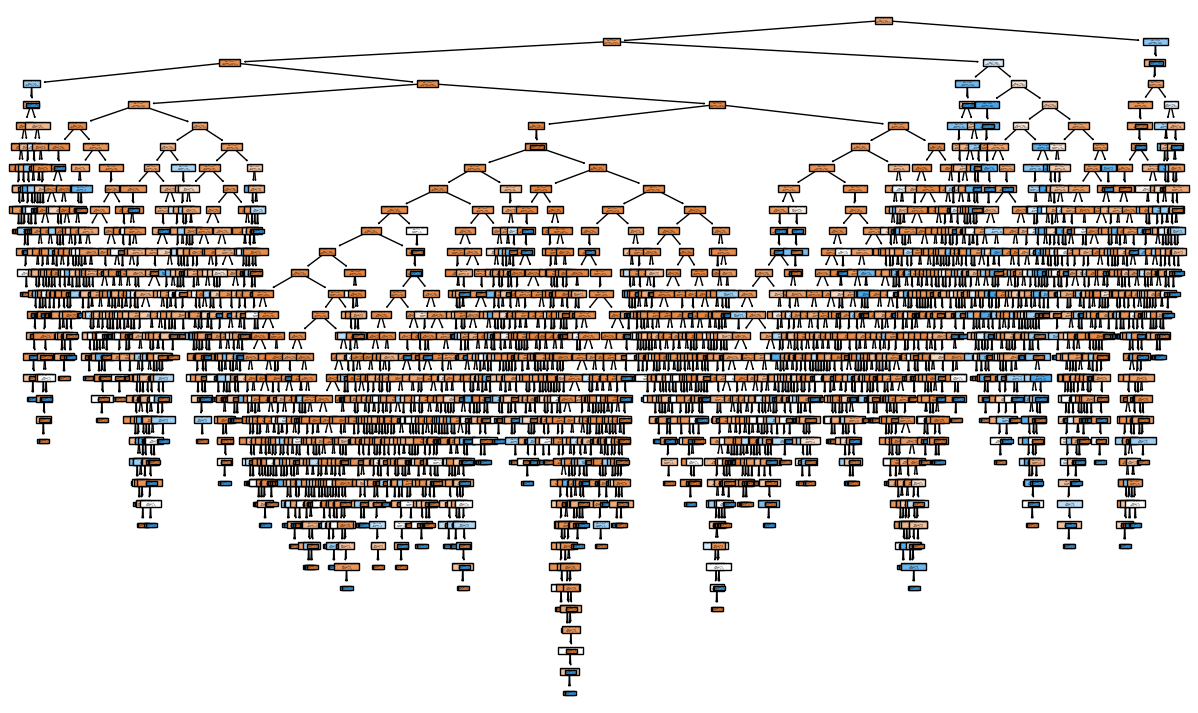

In [63]:
plt.figure(figsize=(15, 9))
plot_tree(tree_clf1, feature_names=risk.columns, filled=True);

In [64]:
# depth of the tree
tree_clf1.get_depth()

32

In [65]:
# n of leaves
tree_clf1.get_n_leaves()

2003

In [66]:
# features ✨
features = tree_clf1.feature_names_in_
features

array(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype=object)

In [67]:
# features importance ✨
importance = tree_clf1.feature_importances_
importance

array([0.04151344, 0.1344583 , 0.14362634, 0.05594659, 0.0940749 ,
       0.16430295, 0.04613057, 0.05281484, 0.23594275, 0.00399932,
       0.02719   ])

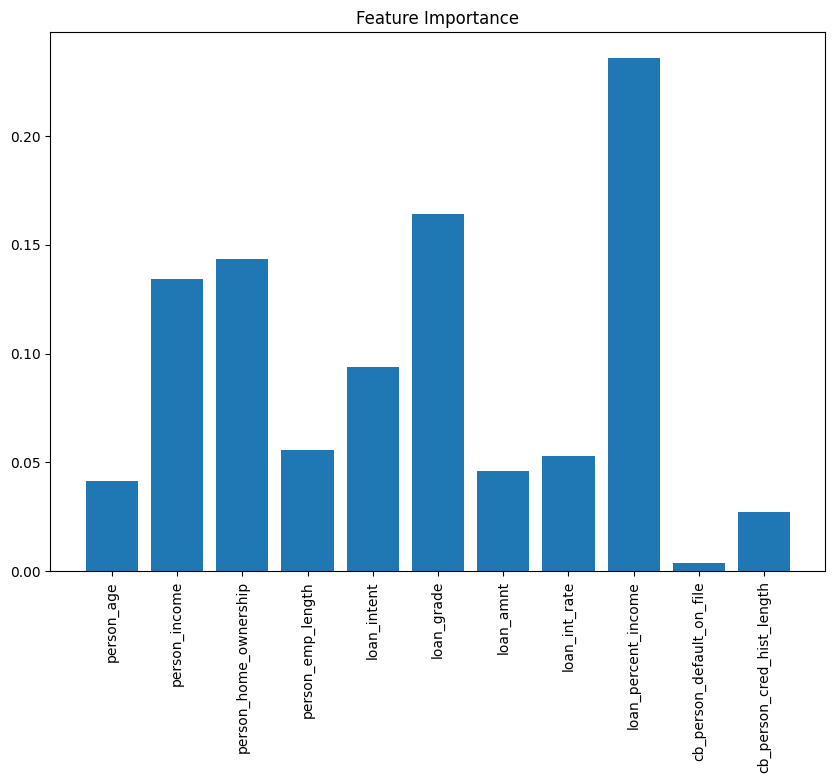

In [68]:
plt.figure(figsize=(10,7))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xticks(rotation=90);

In [69]:
# parameter of the model
tree_clf1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [70]:
# getting the score✨
print(f"Training accuracy : {tree_clf1.score(X_train, y_train)}")
print(f"Test accuracy {tree_clf1.score(X_test, y_test)}")

Training accuracy : 1.0
Test accuracy 0.8853196930946291


In [72]:
# train the decision tree model with post-pruning
path = tree_clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
models = []
for i, ccp_alpha in enumerate(ccp_alphas):
    model = DTC(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    print(f"Accuracy with pruning #{i+1}:", model.score(X_test, y_test))
    models.append(model)

Accuracy with pruning #1: 0.8864450127877238
Accuracy with pruning #2: 0.8864450127877238
Accuracy with pruning #3: 0.8864450127877238
Accuracy with pruning #4: 0.8864450127877238
Accuracy with pruning #5: 0.8866496163682864
Accuracy with pruning #6: 0.8866496163682864
Accuracy with pruning #7: 0.8866496163682864
Accuracy with pruning #8: 0.887468030690537
Accuracy with pruning #9: 0.887468030690537
Accuracy with pruning #10: 0.8875703324808184
Accuracy with pruning #11: 0.8875703324808184
Accuracy with pruning #12: 0.8875703324808184
Accuracy with pruning #13: 0.8875703324808184
Accuracy with pruning #14: 0.8878772378516624
Accuracy with pruning #15: 0.8879795396419438
Accuracy with pruning #16: 0.8879795396419438
Accuracy with pruning #17: 0.8879795396419438
Accuracy with pruning #18: 0.8879795396419438
Accuracy with pruning #19: 0.888081841432225
Accuracy with pruning #20: 0.8882864450127878
Accuracy with pruning #21: 0.8882864450127878
Accuracy with pruning #22: 0.888388746803069
A

Model 0


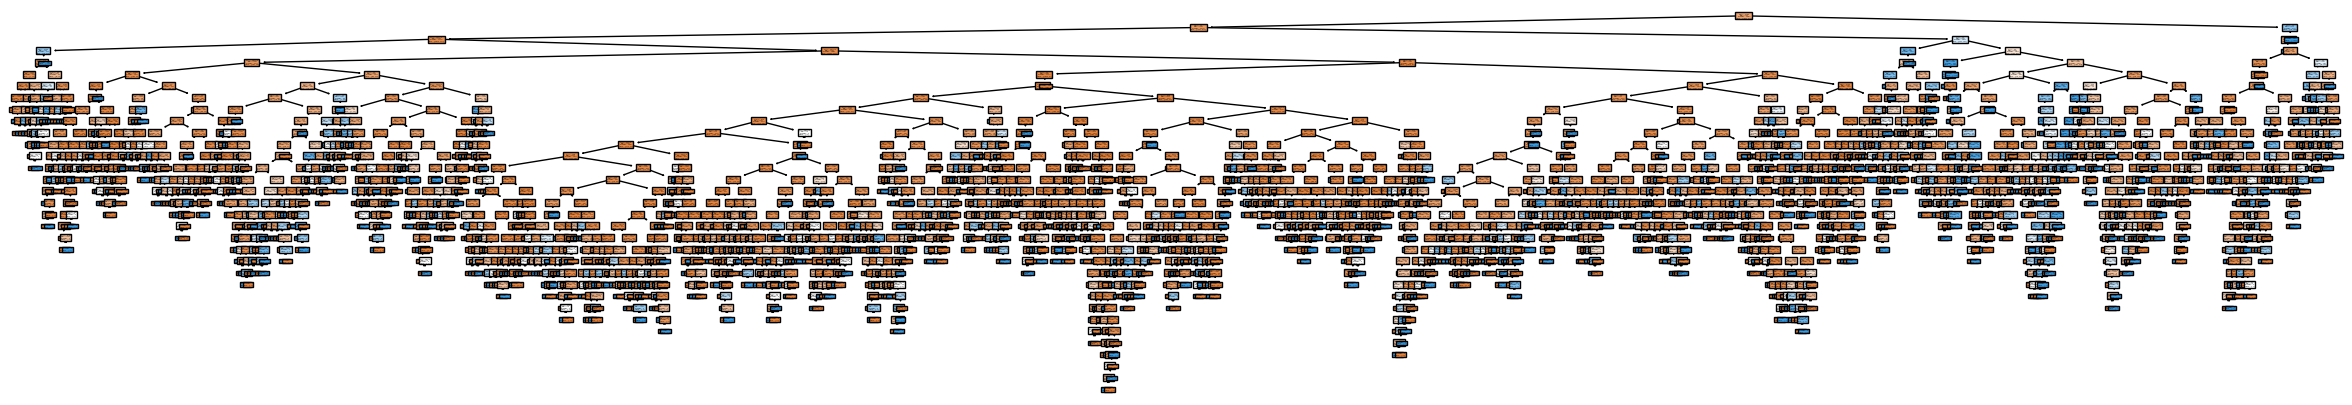

Model 50


In [ ]:
# visualize the pruned decision tree
choosen_models = [0, 50, 100, 200, 300, 400, 500, 600, 620, 680, 682]
for m in choosen_models:
    plt.figure(figsize=(30, 5))
    print(f"Model {m}")
    plot_tree(models[m], filled=True)
    plt.show()

In [ ]:
# this model is overfitting
# doing well on the train (memorizing things not learning)
# to solve this problem we have to make the model more simplier
# by cuting or limiting the size of the tree🌳
# Pruning (post, pre)
path = tree_clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in models]
test_scores = [clf.score(X_test, y_test) for clf in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# let's build our fincal model
# you can try diferent values to cpp_alpha
# try 0.0001
# try 0.1 and other values as you like
tree_clf2 = DTC(ccp_alpha=0.001)

# fitting the model
tree_clf2.fit(X_train, y_train)

# train acc, test acc
tree_clf2.score(X_train, y_train), tree_clf2.score(X_test, y_test)

In [ ]:
# ploting the tree
# train , test
# (0.9208980092957993, 0.9176470588235294)
plt.figure(figsize=(15, 7), dpi=250)
plot_tree(tree_clf2, feature_names=risk.columns, filled=True);

**Cross Validation**

In [ ]:
# using cross validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation (you can change the number of folds as needed)
cv_scores = cross_val_score(tree_clf1, X_train, y_train, cv=5)


# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

In [ ]:
# Perform 5-fold cross-validation (you can change the number of folds as needed)
cv_scores = cross_val_score(tree_clf2, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

In [ ]:
DTC?

In [ ]:
tree_clf3 = DTC(max_depth=10)
# fiting the tree
tree_clf3.fit(X_train, y_train)
# cross val score
cv_scores = cross_val_score(tree_clf3, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# test score
print("Test Score", tree_clf3.score(X_test, y_test))

In [ ]:
# accuracy report
y_pred = tree_clf3.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size as needed
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

tree_clf4 = DTC()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(tree_clf4, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_tree = grid_search.best_estimator_

In [ ]:
best_tree

In [ ]:
print(f"train score {best_tree.score(X_train, y_train)}")
print(f"test score {best_tree.score(X_test, y_test)}")

In [ ]:
pd.DataFrame(grid_search.cv_results_).sample(5)